# World Population
The Wikipedia article on world population contains tables with estimates of world population from prehistory to the present, and projections for the future (<https://modsimpy.com/worldpop>).

The following cell downloads a copy of https://en.wikipedia.org/wiki/World_population_estimates

### System Requirements

In [2]:
try:
    import pint
except ImportError:
    !pip install pint

In [3]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [4]:
%matplotlib inline

In [5]:
# import functions from modsim

from modsim import *

In [6]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


### Simulation Preprocess

In [8]:
from pandas import read_html

In [9]:
filename = 'World_population_estimates.html'
tables = read_html(filename,
                   header=0,
                   index_col=0,
                   decimal='M')

In [10]:
table2 = tables[2]

In [11]:
table2.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']

In [13]:
census = table2.census / 1e9
un = table2.un / 1e9

#### Variables

In [16]:
total_growth = census[2016] - census[1950]
t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0
p_0 = census[t_0]
annual_growth = total_growth / elapsed_time

##Simulation

In [17]:
system = System(t_0=t_0,
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)

In [19]:
show(system)

,value
t_0,1950.000000
t_end,2016.000000
p_0,2.557629
annual_growth,0.072248


### Constant Growth Model

In [24]:
def run_simulation1(system):
    results = TimeSeries()
    results[system.t_0] = system.p_0

    for t in range(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth

    return results

In [21]:
results1 = run_simulation1(system)

In [22]:
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year',
             ylabel='World population (billion)')

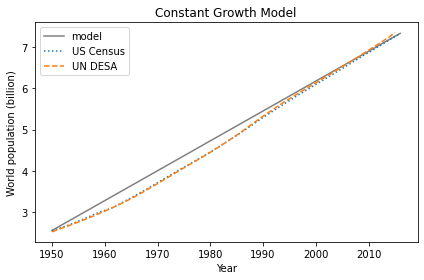

In [23]:
results1.plot(label='model', color='gray')
plot_estimates()
decorate(title='Constant Growth Model')

### Proportional Growth Model

In [27]:
def run_simulation2(system):
    results = TimeSeries()
    results[system.t_0] = system.p_0

    for t in range(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths

    return results

In [28]:
system.death_rate = 7.7 / 1000
system.birth_rate = 25 / 1000

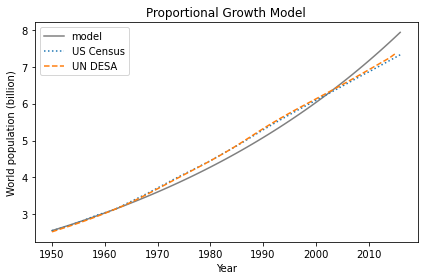

In [29]:
results2 = run_simulation2(system)
results2.plot(label='model', color='gray')
plot_estimates()
decorate(title='Proportional Growth Model')

The proportional model fits the data well from 1950 to 1965, but not so well after that. Overall, the quality of fit is not as good as the constant growth model, which is surprising, because it seems like the proportional model is more realistic.

# Pure Python

In [ ]:
# def run_sim(x, birth_rate, death_rate, alpha, beta):
#     results1, results2, results3, x = [], [], [], np.asarray(x)
#     annual_growth=(x[-1]-x[0])/(len(x)-1)
#     results1.append(x[0])
#     results2.append(x[0])
#     results3.append(x[0])
#     for t in np.arange(1,len(x)):
#         results1.append(results1[t-1] + annual_growth)
#         results2.append(results2[t-1]+(birth_rate-death_rate)* results2[t-1])
#         results3.append(results3[t-1]+ alpha*results3[t-1] + beta*results3[t-1]**2)
#     x=pd.Series(x, index=census.index, name='census')
#     results1=pd.Series(results1, index=census.index, name='constant growth')
#     results2=pd.Series(results2, index=census.index, name='proportional growth')
#     results3=pd.Series(results3, index=census.index, name='quadratic growth')
#     df=pd.concat([results1, results2, results3, x],axis=1)
#     return df
#
# a=run_sim(census, .027, .01,.025,-.0018)
# a.plot(ylabel='World Pop Billions', title='Census & Forecasts', style=['r*--','bo--','y^--','b+-'], figsize=(10,10))

